# ASSESS ERROR DISTRIBUTION

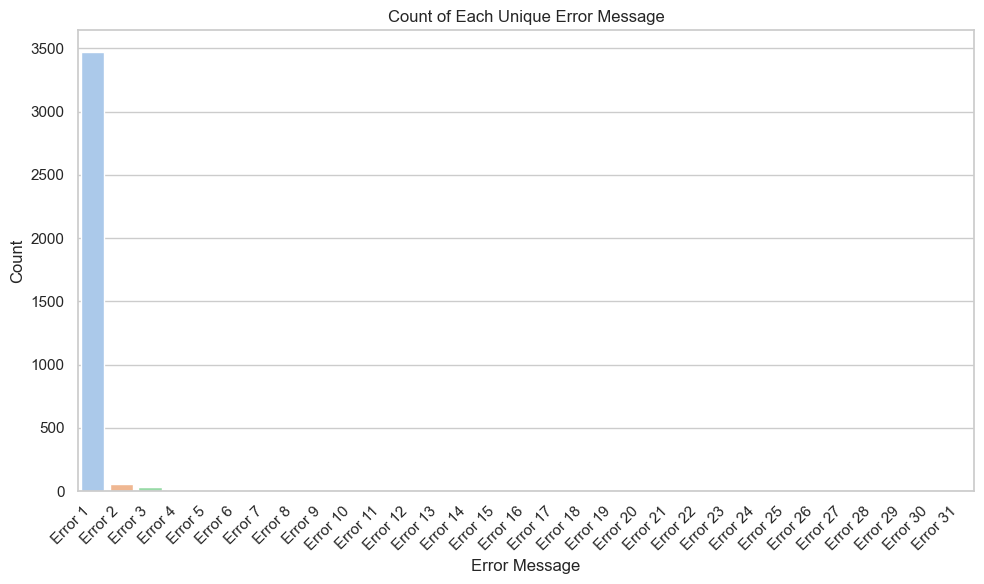

('/Users/neo/Documents/MODS/LL-Eval/error_message_mapping.csv',
 '/Users/neo/Documents/MODS/LL-Eval/error_message_plot.png')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided CSV file
file_path = '/Users/neo/Documents/MODS/LL-Eval/pipeline_error_df.csv'
df = pd.read_csv(file_path)

# Convert all error messages to strings before applying the grouping
df['error_message_grouped'] = df['error_message'].astype(str).apply(
    lambda x: 'Too few focus regions found.' if x.startswith('Too few focus regions found.') else x
)

# Recalculate counts based on the grouped messages
error_counts_grouped = df['error_message_grouped'].value_counts()

# Create a mapping of pseudo labels to the grouped error messages
pseudo_labels_grouped = [f"Error {i+1}" for i in range(len(error_counts_grouped))]
error_mapping = pd.DataFrame({
    'Pseudo_Label': pseudo_labels_grouped,
    'Error_Message': error_counts_grouped.index
})

# Save the mapping to a CSV file
output_path = '/Users/neo/Documents/MODS/LL-Eval/error_message_mapping.csv'
error_mapping.to_csv(output_path, index=False)

# Create a bar plot with seaborn using pastel colors
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x=pseudo_labels_grouped,
    y=error_counts_grouped.values,
    palette="pastel"
)
bar_plot.set_xlabel('Error Message')
bar_plot.set_ylabel('Count')
bar_plot.set_title('Count of Each Unique Error Message')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")

# Save the plot as an image
plot_path = '/Users/neo/Documents/MODS/LL-Eval/error_message_plot.png'
plt.tight_layout()
plt.savefig(plot_path)

# Display the plot in the Jupyter notebook cell
plt.show()

# Display output paths
(output_path, plot_path)


# AGGREGATE PIPELINE RESULT STATISTICS

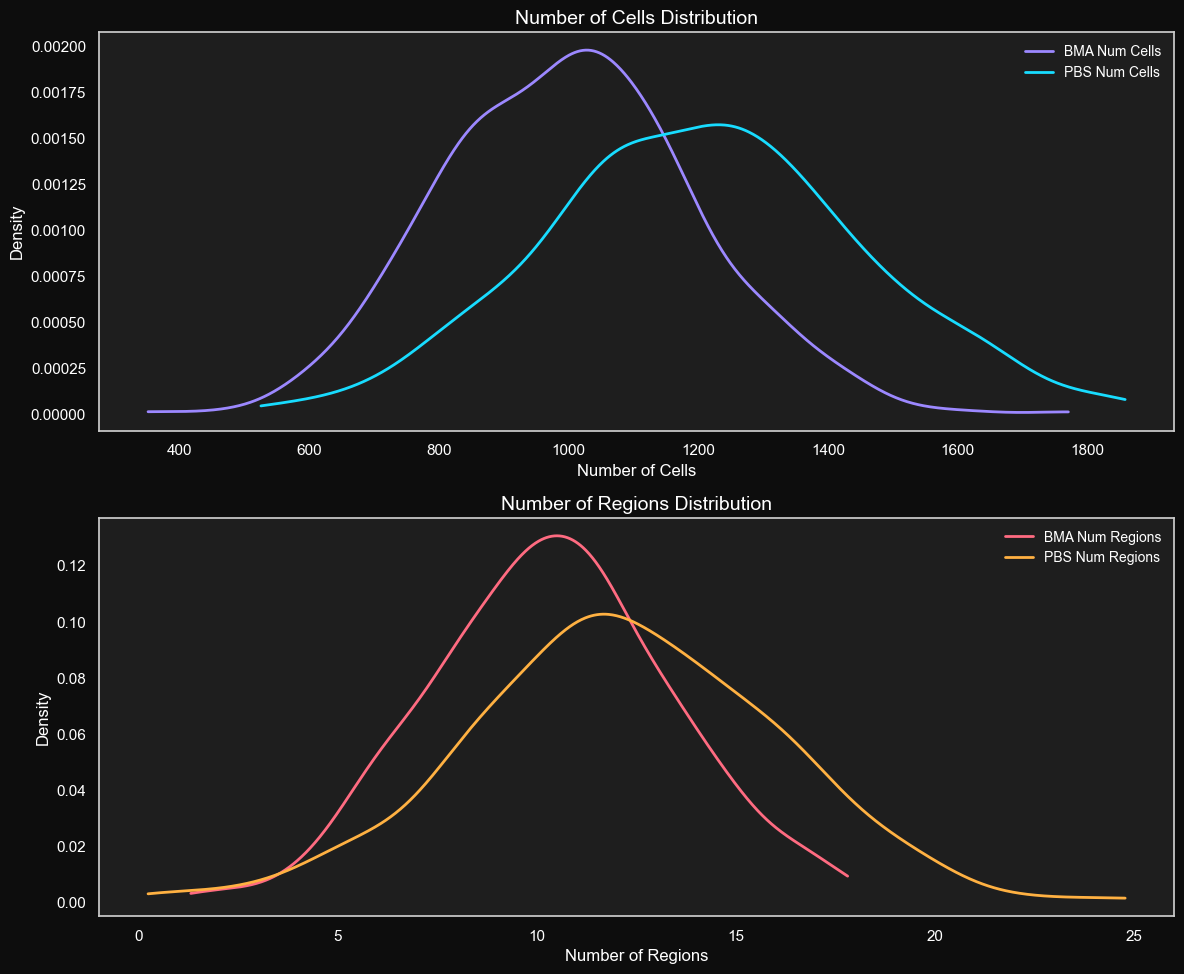

In [19]:
# Adjust the legend text color to white for better visibility.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Simulating data for demonstration purposes.
np.random.seed(42)
df = pd.DataFrame({
    'specimen_type': ['BMA'] * 500 + ['PBS'] * 500,
    'num_cells': np.concatenate((np.random.normal(1000, 200, 500), np.random.normal(1200, 250, 500))),
    'num_regions': np.concatenate((np.random.normal(10, 3, 500), np.random.normal(12, 4, 500)))
})

# Separate the data for BMA and PBS
df_bma = df[df['specimen_type'] == 'BMA']
df_pbs = df[df['specimen_type'] == 'PBS']

# Extract the data
bma_num_cells = df_bma['num_cells'].dropna()
pbs_num_cells = df_pbs['num_cells'].dropna()
bma_num_regions = df_bma['num_regions'].dropna()
pbs_num_regions = df_pbs['num_regions'].dropna()

# Define a function for creating smooth density plots
def plot_density(data, label, color, ax):
    density = gaussian_kde(data)
    xs = np.linspace(min(data), max(data), 1000)
    ax.plot(xs, density(xs), label=label, lw=2, color=color)

# Create subplots for number of cells and number of regions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), facecolor='#0d0d0d')

# Plot the number of cells for BMA and PBS
plot_density(bma_num_cells, 'BMA Num Cells', '#9c88ff', ax1)
plot_density(pbs_num_cells, 'PBS Num Cells', '#18dcff', ax1)
ax1.set_title('Number of Cells Distribution', color='white', fontsize=14)
ax1.set_xlabel('Number of Cells', color='white')
ax1.set_ylabel('Density', color='white')
legend1 = ax1.legend(frameon=False, loc='upper right', fontsize=10)
for text in legend1.get_texts():
    text.set_color('white')
ax1.grid(False)
ax1.set_facecolor('#1e1e1e')
ax1.tick_params(axis='both', colors='white')

# Plot the number of regions for BMA and PBS
plot_density(bma_num_regions, 'BMA Num Regions', '#ff6b81', ax2)
plot_density(pbs_num_regions, 'PBS Num Regions', '#ffb142', ax2)
ax2.set_title('Number of Regions Distribution', color='white', fontsize=14)
ax2.set_xlabel('Number of Regions', color='white')
ax2.set_ylabel('Density', color='white')
legend2 = ax2.legend(frameon=False, loc='upper right', fontsize=10)
for text in legend2.get_texts():
    text.set_color('white')
ax2.grid(False)
ax2.set_facecolor('#1e1e1e')
ax2.tick_params(axis='both', colors='white')

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


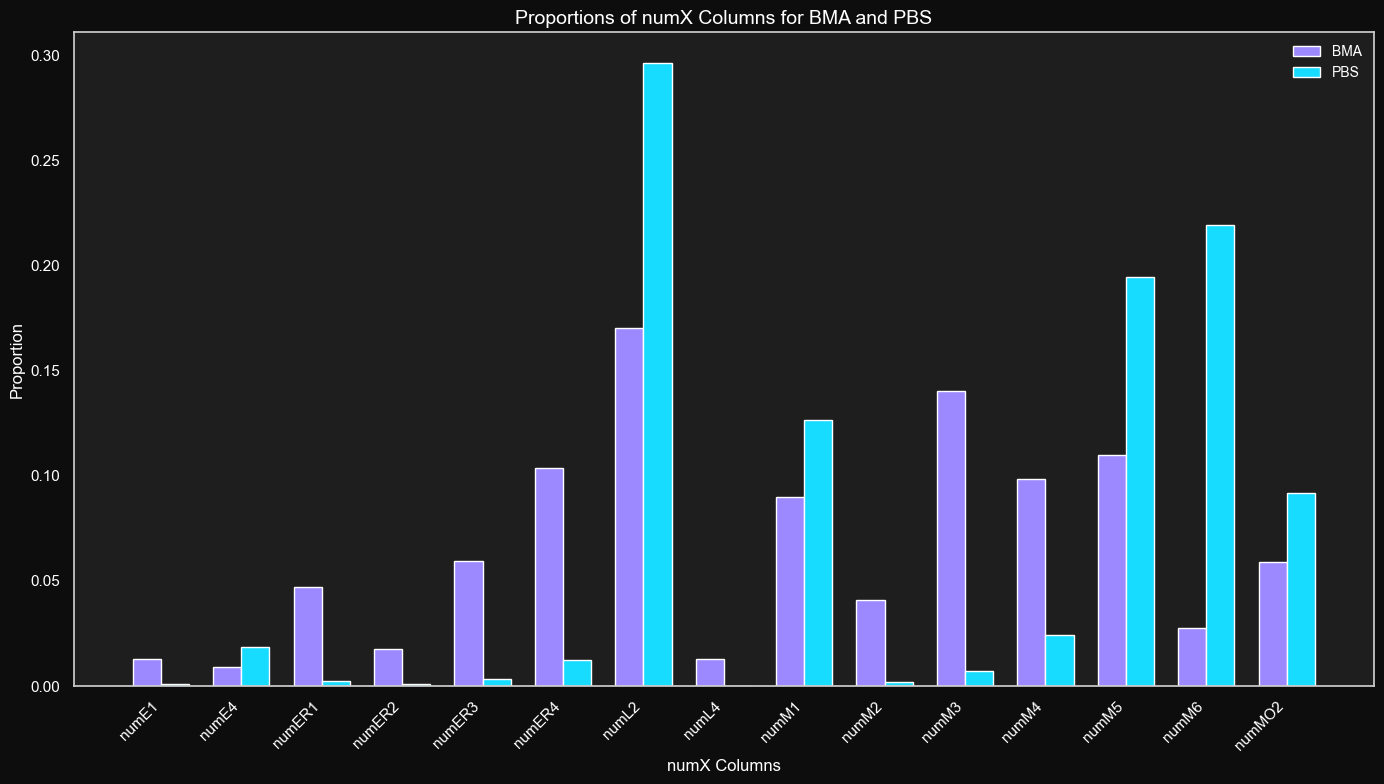

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the error message mapping (simulated as we don't have the actual content)
error_message_mapping_path = '/Users/neo/Documents/MODS/LL-Eval/pipeline_nonerror_aggregate_df.csv'
# Simulating the content of the error message mapping CSV for demonstration purposes
# This would typically be replaced with: pd.read_csv(error_message_mapping_path)

# open the file as df
df = pd.read_csv(error_message_mapping_path)

# Define the omitted and removed classes
omitted_classes = ["B1", "B2"]
removed_classes = ["U1", "PL2", "PL3", "ER5", "ER6", "U4"]

# Identify the columns that match 'numX' and filter out omitted and removed classes
cellnames = [
    "B1", "B2", "E1", "E4", "ER1", "ER2", "ER3", "ER4", "ER5", "ER6",
    "L2", "L4", "M1", "M2", "M3", "M4", "M5", "M6", "MO2", "PL2", "PL3", "U1", "U4"
]
num_columns = [f'num{cell}' for cell in cellnames if f'num{cell}' in df.columns]
filtered_num_columns = [
    col for col in num_columns if not any(
        col.endswith(cls) for cls in omitted_classes + removed_classes
    )
]

# Separate the data for BMA and PBS
df_bma = df[df['specimen_type'] == 'BMA']
df_pbs = df[df['specimen_type'] == 'PBS']

# Calculate the proportion for BMA and PBS
total_bma = df_bma[filtered_num_columns].sum(axis=1)
total_pbs = df_pbs[filtered_num_columns].sum(axis=1)

proportion_bma = (df_bma[filtered_num_columns].div(total_bma, axis=0)).mean()
proportion_pbs = (df_pbs[filtered_num_columns].div(total_pbs, axis=0)).mean()

# Create a bar plot for the proportions of the selected 'numX' columns for BMA and PBS
fig, ax = plt.subplots(figsize=(14, 8), facecolor='#0d0d0d')

# Define bar positions and width
x = np.arange(len(filtered_num_columns))
width = 0.35

# Plot bars for BMA and PBS
bars_bma = ax.bar(x - width/2, proportion_bma, width, label='BMA', color='#9c88ff')
bars_pbs = ax.bar(x + width/2, proportion_pbs, width, label='PBS', color='#18dcff')

# Add labels, title, and legend
ax.set_title('Proportions of numX Columns for BMA and PBS', color='white', fontsize=14)
ax.set_xlabel('numX Columns', color='white')
ax.set_ylabel('Proportion', color='white')
ax.set_xticks(x)
ax.set_xticklabels(filtered_num_columns, rotation=45, ha='right', color='white')
ax.tick_params(axis='y', colors='white')

# Set legend text color to white
legend = ax.legend(frameon=False, loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('white')

# Set background and grid
ax.set_facecolor('#1e1e1e')
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


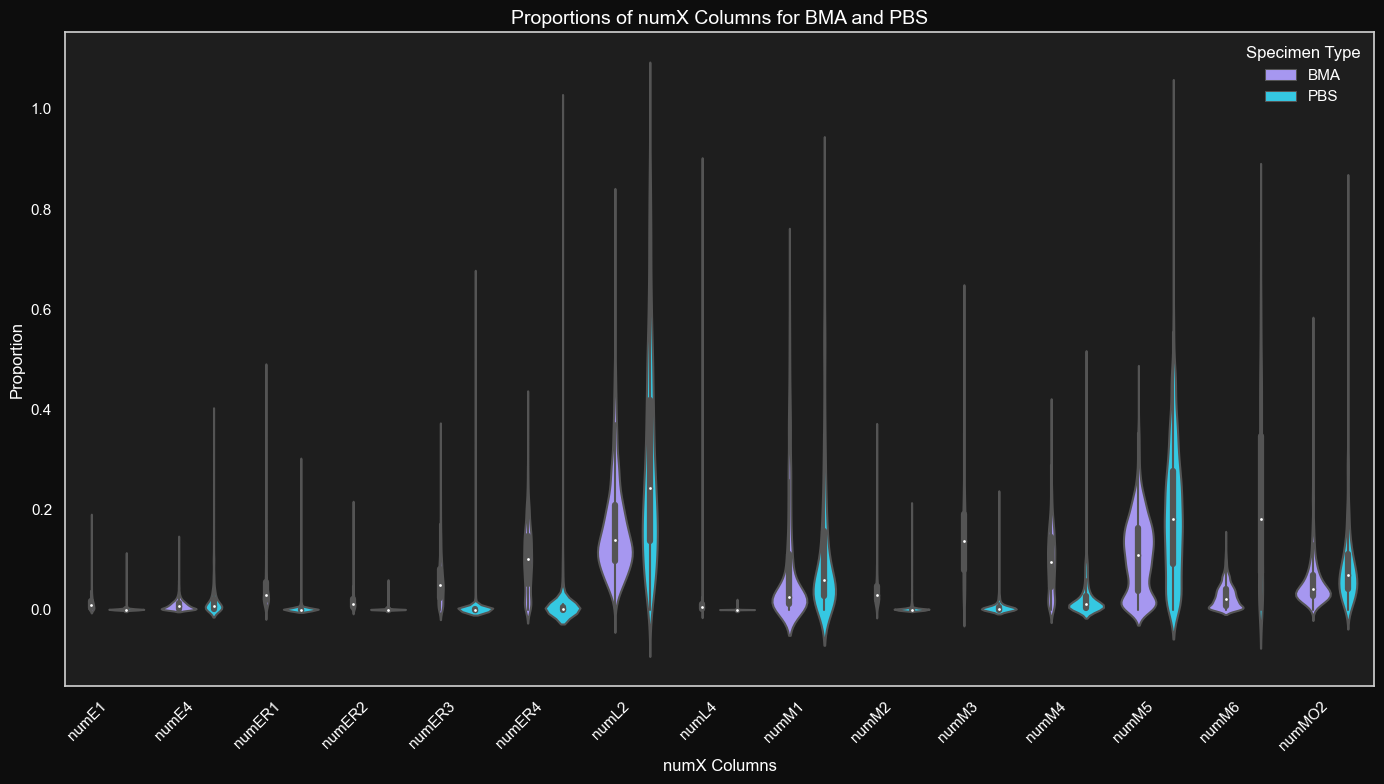

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the error message mapping
error_message_mapping_path = '/Users/neo/Documents/MODS/LL-Eval/pipeline_nonerror_aggregate_df.csv'
df = pd.read_csv(error_message_mapping_path)

# Define the omitted and removed classes
omitted_classes = ["B1", "B2"]
removed_classes = ["U1", "PL2", "PL3", "ER5", "ER6", "U4"]

# Identify the columns that match 'numX' and filter out omitted and removed classes
cellnames = [
    "B1", "B2", "E1", "E4", "ER1", "ER2", "ER3", "ER4", "ER5", "ER6",
    "L2", "L4", "M1", "M2", "M3", "M4", "M5", "M6", "MO2", "PL2", "PL3", "U1", "U4"
]
num_columns = [f'num{cell}' for cell in cellnames if f'num{cell}' in df.columns]
filtered_num_columns = [
    col for col in num_columns if not any(
        col.endswith(cls) for cls in omitted_classes + removed_classes
    )
]

# Separate the data for BMA and PBS
df_bma = df[df['specimen_type'] == 'BMA']
df_pbs = df[df['specimen_type'] == 'PBS']

# Calculate the proportion for BMA and PBS
total_bma = df_bma[filtered_num_columns].sum(axis=1)
total_pbs = df_pbs[filtered_num_columns].sum(axis=1)

proportion_bma = df_bma[filtered_num_columns].div(total_bma, axis=0).stack().reset_index()
proportion_pbs = df_pbs[filtered_num_columns].div(total_pbs, axis=0).stack().reset_index()

# Prepare data for violin plot
proportions_df = pd.concat([proportion_bma, proportion_pbs], axis=0)
proportions_df.columns = ['index', 'numX', 'Proportion']
proportions_df['Specimen_Type'] = ['BMA'] * len(proportion_bma) + ['PBS'] * len(proportion_pbs)

# Create the violin plot with separate violins for BMA and PBS
plt.figure(figsize=(14, 8), facecolor='#0d0d0d')
sns.violinplot(
    data=proportions_df, 
    x='numX', 
    y='Proportion', 
    hue='Specimen_Type', 
    split=False, 
    palette={'BMA': '#9c88ff', 'PBS': '#18dcff'},
    dodge=True
)

# Customize the plot appearance
plt.title('Proportions of numX Columns for BMA and PBS', color='white', fontsize=14)
plt.xlabel('numX Columns', color='white')
plt.ylabel('Proportion', color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')

# Adjust the legend and background
legend = plt.legend(title='Specimen Type', frameon=False)
legend.get_title().set_color('white')
for text in legend.get_texts():
    text.set_color('white')

plt.gca().set_facecolor('#1e1e1e')
plt.grid(False)
plt.tight_layout()
plt.show()
